# Model Training

## 1.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warning Library

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

In [2]:
pip install Warning

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Warning (from versions: none)
ERROR: No matching distribution found for Warning


In [1]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r"C:\Users\DB0186AU\Documents\Projects\ML Project-1\notebook\Student exam.csv")

# Show top 5 row

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# Preparing X and Y variables

In [4]:
X = df.drop(columns = ['math score'], axis = 1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group A,high school,standard,completed,67,63
1,female,group D,some high school,free/reduced,none,59,55
2,male,group E,some college,free/reduced,none,60,50
3,male,group B,high school,standard,none,78,68
4,male,group E,associate's degree,standard,completed,73,68


In [5]:
X.shape

(1000, 7)

In [6]:
print("Categories in 'gender' variable", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable", end = " ")
print(df['test preparation course'].unique())

Categories in 'gender' variable ['male' 'female']
Categories in 'race/ethnicity' variable ['group A' 'group D' 'group E' 'group B' 'group C']
Categories in 'parental level of education' variable ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in 'lunch' variable ['standard' 'free/reduced']
Categories in 'test preparation course' variable ['completed' 'none']


In [7]:
y = df['math score']
y

0      67
1      40
2      59
3      77
4      78
       ..
995    73
996    85
997    32
998    73
999    65
Name: math score, Length: 1000, dtype: int64

In [8]:
# Create Column transfer with 3 types of tranformers
num_features = X.select_dtypes(exclude = 'object').columns
cat_fetures = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
      ("OneHotEncoder", oh_transformer, cat_fetures),
      ("StandardScaler", numeric_transformer, num_features), 
    ]

)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [26]:
# Seperate Dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Create an Evaluate Function to give all metrics after model Training

In [27]:
X_train

array([[ 1.        ,  0.        ,  1.        , ...,  1.        ,
        -1.01847253, -1.07341779],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.22186833,  1.42767516],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.40747048, -0.36798132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.56131391,  1.42767516],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.22186833,  0.97876104],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.61086627,  0.59397751]])

In [28]:
y_train

29     33
535    82
695    68
557    69
836    53
       ..
106    82
270    71
860    98
435    83
102    79
Name: math score, Length: 800, dtype: int64

In [29]:
X_train.shape

(800, 19)

In [30]:
y_train.shape

(800,)

In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose = False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)#Train Model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absoulte Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print("---------------------------------------------")
    
    print("Model Performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absoulte Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 5.5554
- Mean Absoulte Error: 4.4441
- R2 Score: 0.8701
---------------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.5521
- Mean Absoulte Error: 4.5916
- R2 Score: 0.8683


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.8168
- Mean Absoulte Error: 5.4228
- R2 Score: 0.8044
---------------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 6.8049
- Mean Absoulte Error: 5.3352
- R2 Score: 0.8022


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 5.5331
- Mean Absoulte Error: 4.4431
- R2 Score: 0.8711
---------------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.5058
- Mean Absoulte Error: 4.5654
- R2 Score: 0.8705


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Squared Error: 5.8186
- Mean Absoulte Error: 4.6448
- R2 Scor

# Results

In [34]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_score']).sort_values(by = "R2_score", ascending=False)

,Model Name,R2_score
2,Ridge,0.870487
0,Linear Regression,0.868296
7,CatBoosting Regressor,0.855096
5,Random Forest Regressor,0.843558
6,XGBRegressor,0.825770
8,AdaBoost Regressor,0.825620
3,K-Neighbors Regressor,0.811901
1,Lasso,0.802157
4,Decision Tree,0.685185


# Ridge

In [36]:
ridge = Ridge(fit_intercept=True, alpha = 1.0, solver = 'auto')
ridge = ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.05


# Plot y_pred and y_test

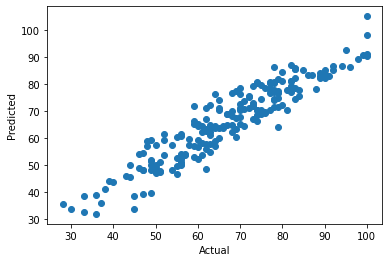

In [37]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel("Predicted");

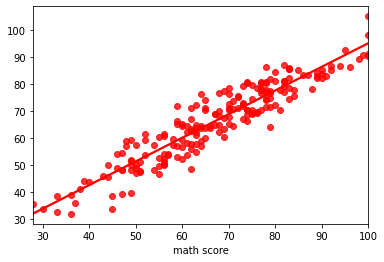

In [38]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'red');

# Difference betwwen Actual and Predicted Values

In [40]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,65,70.312677,-5.312677
737,83,85.875379,-2.875379
740,52,59.218261,-7.218261
660,90,82.411776,7.588224
411,62,62.571449,-0.571449
...,...,...,...
408,52,53.569955,-1.569955
332,56,54.040125,1.959875
208,77,77.731193,-0.731193
613,83,78.460579,4.539421
